In [1]:
%load_ext autoreload
%autoreload 2

import pyscisci.all as pyscisci

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
try:
    import seaborn as sns
    sns.set_style('white')
except:
    pass

%matplotlib inline

In [14]:
path2mag = '/Volumes/GatesExpansionDrive/DataSets/MAG'
path2wos = '/Volumes/GatesExpansionDrive/DataSets/WOS'
path2dblp = '/Volumes/GatesExpansionDrive/DataSets/DBLP'
path2aps = '/Volumes/GatesExpansionDrive/DataSets/APS/APS2019'


In [15]:

myaps = pyscisci.APS(path2aps)
apspubs = myaps.load_publications(columns=['PublicationId', 'Year', 'JournalId'])

npubs_aps = apspubs.groupby('Year')['PublicationId'].nunique().to_frame().reset_index()
njournals_aps = apspubs.groupby('Year')['JournalId'].nunique().to_frame().reset_index()
aps_values = npubs_aps.merge(njournals_aps, on='Year', how='left')
aps_values['AuthorId'] = None
aps_values

,Year,PublicationId,JournalId,AuthorId
0,1893,20,1,None
1,1894,36,1,None
2,1895,36,1,None
3,1896,36,1,None
4,1897,54,1,None
...,...,...,...,...
122,2015,18016,11,None
123,2016,18916,12,None
124,2017,19531,13,None
125,2018,19977,13,None


In [16]:
mydblp = pyscisci.DBLP(path2dblp)
dblppubs = mydblp.load_publications(columns=['PublicationId', 'Year', 'JournalId'])
pub2year = {pid:y for pid, y in dblppubs[['PublicationId', 'Year']].values}

npubs_dblp = dblppubs.groupby('Year')['PublicationId'].nunique().to_frame().reset_index()
njournals_dblp = dblppubs.groupby('Year')['JournalId'].nunique().to_frame().reset_index()


dblpauthors = mydblp.load_publicationauthor(columns=['PublicationId', 'AuthorId'],
                                                      duplicate_subset=['PublicationId', 'AuthorId'])
#pub2year = mydblp.pub2year
dblpauthors['Year'] = [pub2year.get(pid, None) for pid in dblpauthors['PublicationId'].values]
dblpauthors.dropna(inplace=True)

nauthors_dblp = dblpauthors.groupby('Year')['AuthorId'].nunique().to_frame().reset_index()

dblp_values = npubs_dblp.merge(njournals_dblp, how='left', on='Year')
dblp_values = dblp_values.merge(nauthors_dblp, how='left', on='Year')
dblp_values


,Year,PublicationId,JournalId,AuthorId
0,0,3,1,NaN
1,1918,1,1,1.0
2,1936,12,1,8.0
3,1937,15,1,12.0
4,1938,11,2,10.0
...,...,...,...,...
83,2017,325290,1447,558911.0
84,2018,355119,1422,613877.0
85,2019,383863,1379,674824.0
86,2020,107064,1105,269986.0


In [6]:
mymag = pyscisci.MAG(path2mag)
magpubs = mymag.load_publications(columns=['PublicationId', 'Year', 'JournalId'])
pub2year = {pid:y for pid, y in magpubs[['PublicationId', 'Year']].values}

npubs_mag = magpubs.groupby('Year')['PublicationId'].nunique()
njournals_mag = magpubs.groupby('Year')['JournalId'].nunique()


In [7]:
magauthors = mymag.load_publicationauthoraffiliation(columns=['PublicationId', 'AuthorId'],
                                                      duplicate_subset=['PublicationId', 'AuthorId'])
#pub2year = mydblp.pub2year
magauthors['Year'] = [pub2year.get(pid, None) for pid in magauthors['PublicationId'].values]
magauthors.dropna(inplace=True)

nauthors_mag = magauthors.groupby('Year')['AuthorId'].nunique()



In [8]:
if False:
    mywos = pyscisci.WOS(path2wos)
    magpubs = mywos.load_publications(columns=['PublicationId', 'Year', 'JournalId'])
    pub2year = {pid:y for pid, y in magpubs[['PublicationId', 'Year']].values}

    npubs_wos = magpubs.groupby('Year')['PublicationId'].nunique()
    njournals_wos = magpubs.groupby('Year')['JournalId'].nunique()
    
    wosauthors = mywos.load_publicationauthoraffiliation(columns=['PublicationId', 'AuthorId'],
                                                      duplicate_subset=['PublicationId', 'AuthorId'])

    wosauthors['Year'] = [pub2year.get(pid, None) for pid in wosauthors['PublicationId'].values]
    wosauthors.dropna(inplace=True)

    nauthors_wos = wosauthors.groupby('Year')['AuthorId'].nunique()

wospubs = pd.read_hdf('/Users/ajgates/Documents/WOSyearlysize.hdf')
npubs_wos = pd.Series(wospubs['NumPubs'].values, index=wospubs['PubYear'].values)
njournals_wos = pd.Series(wospubs['NumJournals'].values, index=wospubs['PubYear'].values)
nauthors_wos = pd.Series(wospubs['NumAuthors'].values, index=wospubs['PubYear'].values)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 87 but corresponding boolean dimension is 88

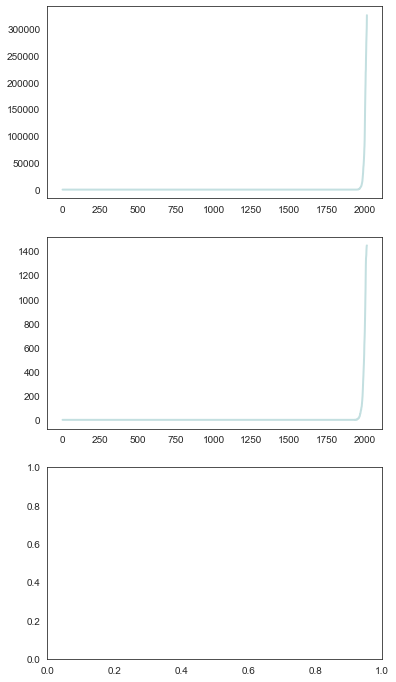

In [13]:
dblp_color = '#7A82AB'
aps_color = '#307473'
mag_color = '#12664F'
wos_color = '#2DC2BD'

fig, ax = plt.subplots(3, 1, figsize=(6, 12))

years = npubs_dblp.index.values <= 2017
ax[0].plot(npubs_dblp.index.values[years], npubs_dblp.values[years], lw=2, color=dblp_color, label='DBLP')
ax[1].plot(njournals_dblp.index.values[years], njournals_dblp.values[years], lw=2, color=dblp_color)
ax[2].plot(nauthors_dblp.index.values[years], nauthors_dblp.values[years], lw=2, color=dblp_color)

ax[0].plot(npubs_aps.index.values, npubs_aps.values, color=aps_color, label='APS')
ax[1].plot(njournals_aps.index.values, njournals_aps.values, color=aps_color)


ax[0].plot(npubs_mag.index.values, npubs_mag.values, color=mag_color, label='MAG')
ax[1].plot(njournals_mag.index.values, njournals_mag.values, color=mag_color)
ax[2].plot(nauthors_mag.index.values, nauthors_mag.values, color=mag_color)

ax[0].plot(npubs_wos.index.values, npubs_wos.values, color=wos_color, label='WOS')
ax[1].plot(njournals_wos.index.values, njournals_wos.values, color=wos_color)
ax[2].plot(nauthors_wos.index.values, nauthors_wos.values, color=wos_color)

ax[0].set_ylabel('Number of publications')
ax[1].set_ylabel('Number of journals')
ax[2].set_ylabel('Number of authors')

handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, labels)

for iax in range(3):
    ax[iax].set_yscale('log')
    
    ax[iax].set_xlim([1800, 2020])

for iax in [0,2]:
    ax[iax].set_yticks([10**0, 10**2, 10**4, 10**6])

plt.savefig('DatabaseGrowth.pdf')
plt.show()